
WeatherPy
Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [164]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#CSV Import
city_data_csv = pd.read_csv("citiesSmall.csv")

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key #### Add your own key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Generate the Cities List by Using the citipy Library¶

In [189]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

lnts =[]
lngs = []
# # Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
# lats=city_data_csv["Lat"]
# lngs=city_data_csv["Lng"]

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
city_data_df.head()

Number of cities in the list: 630


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,abha,18.2164,42.5053,59.25,51,0,6.91,SA,1674719369
1,farsund,58.0948,6.8047,38.95,100,2,8.50,NO,1674719369
2,new norfolk,-42.7826,147.0587,65.88,36,23,4.09,AU,1674719370
3,jamestown,42.0970,-79.2353,32.02,97,100,23.02,US,1674719099
4,lanzhou,36.0564,103.7922,25.61,28,0,8.93,CN,1674719370


Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [190]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_latitute = city_weather["coord"]["lat"]
        city_longitude = city_weather["coord"]["lon"]
        city_max_temperature = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_latitute, 
                          "Lng": city_longitude, 
                          "Max Temp": city_max_temperature,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found...")
        pass
              
# Indicate that Data Loading is complete 
# print(city_url)
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | along
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | souillac
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | nizhneyansk
City not found...
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | faanui
Processing Record 12 of Set 1 | ahipara
Processing Record 13 of Set 1 | taolanaro
City not found...
Processing Record 14 of Set 1 | manavalakurichi
Processing Record 15 of Set 1 | nanortalik
Processing Record 16 of Set 1 | alta floresta
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | bengkulu
Processing Record 19 of Set 1 | ferme-neuve
Processing Record 20 of Set 1 | stephanskirchen
Processing Record 21 of Set 1 | mataura
Processing Record 

In [191]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [192]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,59.77,88,75,18.41,PT,1674719645
1,rikitea,-23.1203,-134.9692,78.30,79,56,17.22,PF,1674719646
2,ushuaia,-54.8000,-68.3000,42.46,61,20,5.75,AR,1674719619
3,along,28.1667,94.7667,78.89,28,27,2.06,IN,1674719647
4,talnakh,69.4865,88.3972,-2.79,96,100,15.14,RU,1674719647


In [193]:
# Export the City_Data into a csv
city_data_df.to_csv("random_cities.csv", index_label="City_ID")

In [194]:
# Read saved data
city_data_df = pd.read_csv("random_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,59.77,88,75,18.41,PT,1674719645
1,rikitea,-23.1203,-134.9692,78.30,79,56,17.22,PF,1674719646
2,ushuaia,-54.8000,-68.3000,42.46,61,20,5.75,AR,1674719619
3,along,28.1667,94.7667,78.89,28,27,2.06,IN,1674719647
4,talnakh,69.4865,88.3972,-2.79,96,100,15.14,RU,1674719647


Create the Scatter Plots Requested
Latitude Vs. Temperature¶


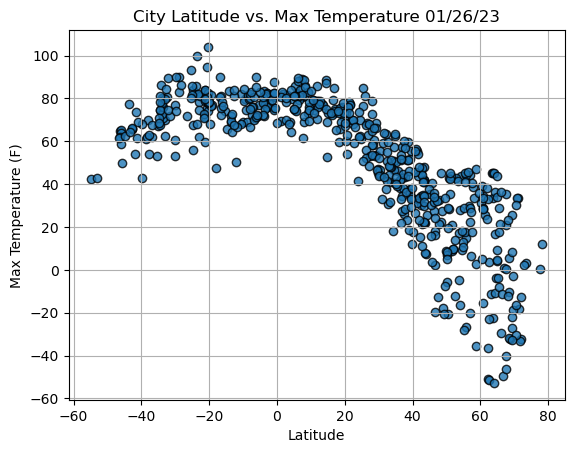

In [195]:
#Graph Values
lats = city_data_df["Lat"]
temps = city_data_df["Max Temp"]

# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

Latitude Vs. Humidity

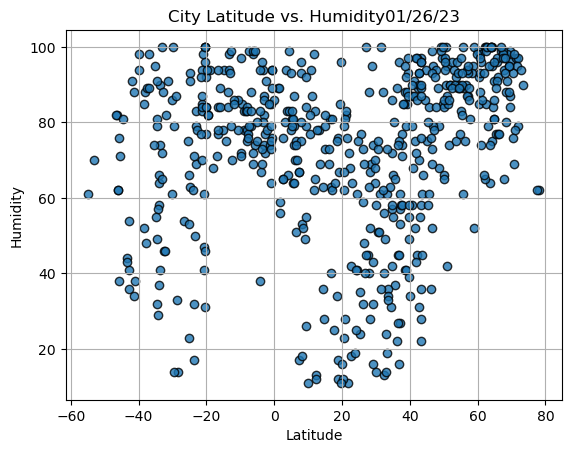

In [196]:
#Graph Values
lats = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

Latitude Vs. Cloudiness

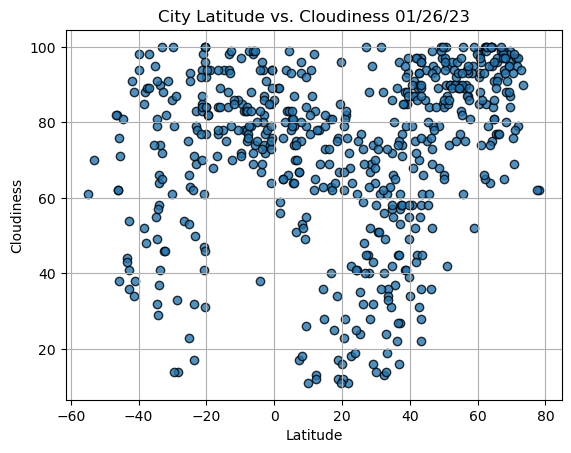

In [197]:
#Graph Values
lats = city_data_df["Lat"]
clouds = city_data_df["Cloudiness"]

# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

Latitude vs. Wind Speed Plot

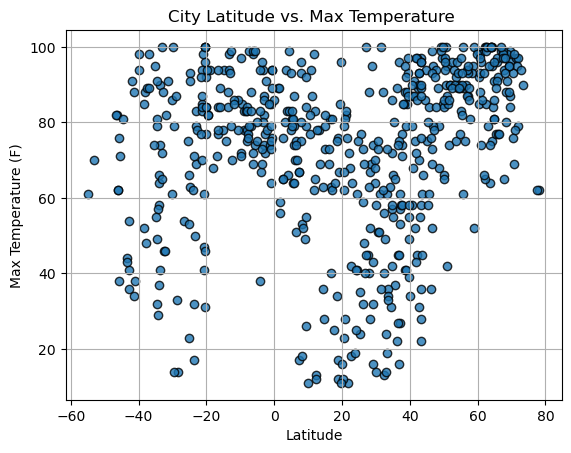

In [198]:
#Graph Values
lats = city_data_df["Lat"]
clouds = city_data_df["Cloudiness"]

# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature ")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

Requirement 2: Compute Linear Regression for Each Relationship

In [199]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(f"r-value: {r_value:} ")
    regress_values = x_values * slope + intercept
    

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")

    
    plt.annotate(line_eq, text_coordinates,
                fontsize=10,
                color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title, wrap=True)
    plt.show()
    

In [200]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,59.77,88,75,18.41,PT,1674719645
3,along,28.1667,94.7667,78.89,28,27,2.06,IN,1674719647
4,talnakh,69.4865,88.3972,-2.79,96,100,15.14,RU,1674719647
7,barrow,71.2906,-156.7887,-18.40,97,95,15.39,US,1674719650
11,manavalakurichi,8.1333,77.3000,85.66,53,99,5.10,IN,1674719654


In [201]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rikitea,-23.1203,-134.9692,78.30,79,56,17.22,PF,1674719646
2,ushuaia,-54.8000,-68.3000,42.46,61,20,5.75,AR,1674719619
5,cape town,-33.9258,18.4232,76.12,58,0,9.22,ZA,1674719396
6,souillac,-20.5167,57.5167,75.58,100,75,9.22,MU,1674719648
8,arraial do cabo,-22.9661,-42.0278,74.50,83,0,4.97,BR,1674719651


Temperature vs. Latitude Linear Regression Plot

r-value: -0.8359848635648015 


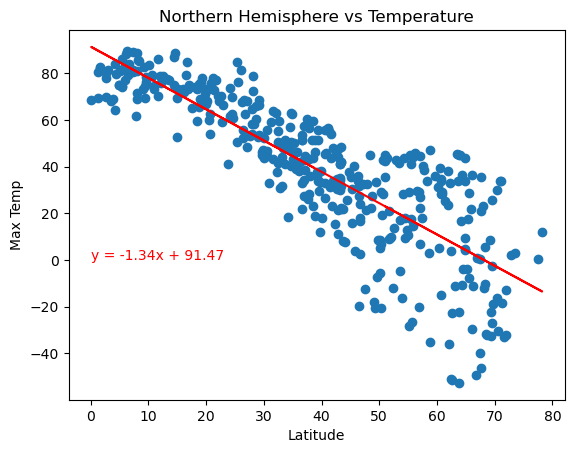

In [202]:
# Linear regression on Northern Hemisphere
# Build scatter plot for each data type:
# x_values = northern_hemi_df["Lat"]
# y_values = northern_hemi_df["Max Temp"]

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.scatter(x_values,y_values, color="blue", edgecolors="black")
# plt.plot(x_values,regress_values, "darkred", linewidth=2)

# plt.title("Northern Hemi Temperature vs. Latitude Linear Regression Plot", fontsize=18)
# plt.ylabel("Max Temp (F)", fontsize=15, color="black")
# plt.xlabel("Latitude", fontsize=15, color="black")
# plt.annotate(line_eq,(1, 1), fontsize=15, color="darkred")

# plt.ylim(min(northern_hemi_df["Max Temp"])-10, max(northern_hemi_df["Max Temp"])+10)
# plt.xlim(-3, max(northern_hemi_df["Lat"])+3)

# 
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

# Call the function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.savefig("N_Hem_Temperature_vs._Latitude_Linear_Regression_Plot.png")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plot_linear_regression(x_values, y_values,
                       "Northern Hemisphere vs Temperature",
                       "Max Temp",(0,-0))

r-value: 0.4473635430464257 


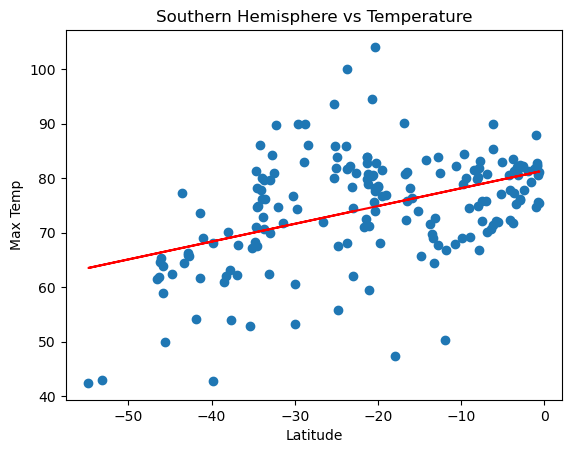

In [203]:
# Linear regression on Southern Hemisphere
# Build scatter plot for each data type:
# x_values = southern_hemi_df["Lat"]
# y_values = southern_hemi_df["Max Temp"]

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.scatter(x_values,y_values, color="blue", edgecolors="black")
# plt.plot(x_values,regress_values, "darkred", linewidth=2)

# plt.title("Southern Hemi Temperature vs. Latitude Linear Regression Plot", fontsize=18)
# plt.ylabel("Max Temp (F)", fontsize=15, color="black")
# plt.xlabel("Latitude", fontsize=15, color="black")
# plt.annotate(line_eq,(1, 1), fontsize=15, color="darkred")

# plt.ylim(min(southern_hemi_df["Max Temp"])-10, max(southern_hemi_df["Max Temp"])+10)
# plt.xlim(-3, max(southern_hemi_df["Lat"])+3)

# 
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

# Call the function
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.savefig("S_Hem_Temperature_vs._Latitude_Linear_Regression_Plot.png")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plot_linear_regression(x_values, y_values,
                       "Southern Hemisphere vs Temperature",
                       "Max Temp",(-0,0))

Discussion about the linear relationship: YOUR RESPONSE HERE

Humidity vs. Latitude Linear Regression Plot

r-value: 0.4080388686418539 


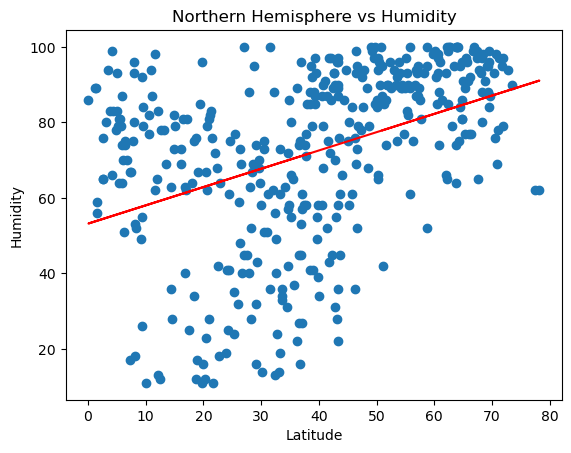

In [204]:
# # Northern Hemisphere
# # Build scatter plot for each data type:
# x_values = northern_hemi_df["Lat"]
# y_values = northern_hemi_df["Humidity"]

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.scatter(x_values,y_values, color="blue", edgecolors="black")
# plt.plot(x_values,regress_values, "darkred", linewidth=2)

# plt.title("Northern Hemi Humidity vs. Latitude Linear Regression Plot", fontsize=18)
# plt.ylabel("Humidity", fontsize=15, color="black")
# plt.xlabel("Latitude", fontsize=15, color="black")
# plt.annotate(line_eq,(1, 1), fontsize=15, color="darkred")

# plt.ylim(min(northern_hemi_df["Humidity"])-10, max(northern_hemi_df["Humidity"])+10)
# plt.xlim(-3, max(northern_hemi_df["Lat"])+3)

# 
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

# Call the function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.savefig("N_Hem_Humidity_vs._Latitude_Linear_Regression_Plot.png")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plot_linear_regression(x_values,
                       y_values,
                       "Northern Hemisphere vs Humidity",
                       "Humidity",
                       (-0,0))

r-value: 0.33103533643418076 


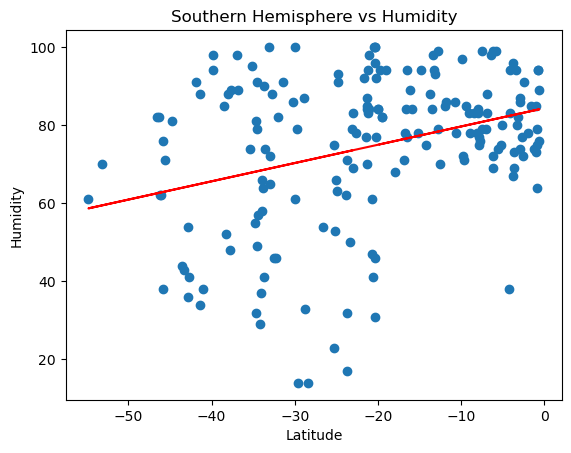

In [205]:
# Southern Hemisphere
# x_values = southern_hemi_df["Lat"]
# y_values = southern_hemi_df["Humidity"]

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.scatter(x_values,y_values, color="blue", edgecolors="black")
# plt.plot(x_values,regress_values, "darkred", linewidth=2)

# plt.title("Southern Hemi Humidity vs. Latitude Linear Regression Plot", fontsize=18)
# plt.ylabel("Humidity", fontsize=15, color="black")
# plt.xlabel("Latitude", fontsize=15, color="black")
# plt.annotate(line_eq,(1, 1), fontsize=15, color="darkred")

# plt.ylim(min(southern_hemi_df["Humidity"])-10, max(southern_hemi_df["Humidity"])+10)
# plt.xlim(-3, max(southern_hemi_df["Lat"])+3)

# 
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

# Call the function
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.savefig("S_Hem_Humidity_vs._Latitude_Linear_Regression_Plot.png")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plot_linear_regression(x_values,
                       y_values,
                       "Southern Hemisphere vs Humidity",
                       "Humidity",
                       (-0,0))


Discussion about the linear relationship: YOUR RESPONSE HERE

Cloudiness vs. Latitude Linear Regression Plot

r-value: 0.2808776410933756 


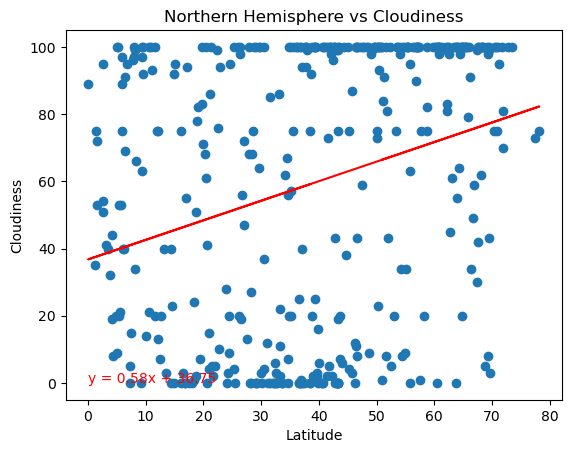

In [206]:
# Northern Hemisphere
# Build scatter plot for each data type:
# x_values = northern_hemi_df["Lat"]
# y_values = northern_hemi_df["Cloudiness"]

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.scatter(x_values,y_values, color="blue", edgecolors="black")
# plt.plot(x_values,regress_values, "darkred", linewidth=2)

# plt.title("Northern Hemi Cloudiness vs. Latitude Linear Regression Plot", fontsize=18)
# plt.ylabel("Cloudiness", fontsize=15, color="black")
# plt.xlabel("Latitude", fontsize=15, color="black")
# plt.annotate(line_eq,(1, 1), fontsize=15, color="darkred")

# plt.ylim(min(northern_hemi_df["Cloudiness"])-10, max(northern_hemi_df["Cloudiness"])+10)
# plt.xlim(-3, max(northern_hemi_df["Lat"])+3)

# 
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

# Call the function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.savefig("N_Hem_Cloudiness_vs._Latitude_Linear_Regression_Plot.png")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plot_linear_regression(x_values,
                       y_values,
                       "Northern Hemisphere vs Cloudiness",
                       "Cloudiness",
                       (-0,0))


r-value: 0.2962334294863284 


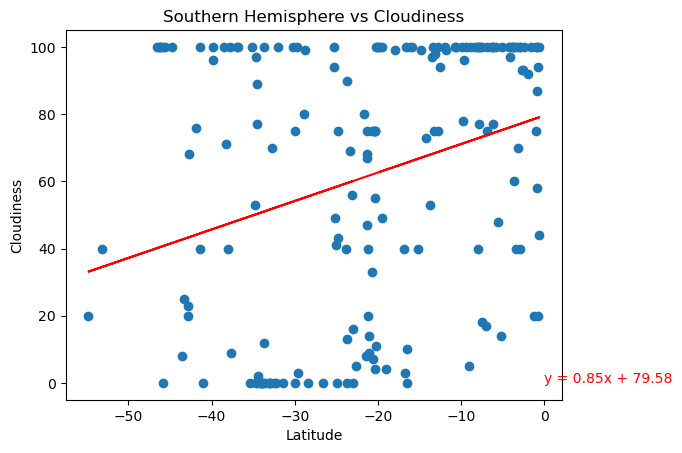

In [207]:
# Southern Hemisphere
# Build scatter plot for each data type:
# x_values = southern_hemi_df["Lat"]
# y_values = southern_hemi_df["Cloudiness"]

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.scatter(x_values,y_values, color="blue", edgecolors="black")
# plt.plot(x_values,regress_values, "darkred", linewidth=2)

# plt.title("Southern Hemi Cloudiness vs. Latitude Linear Regression Plot", fontsize=18)
# plt.ylabel("Cloudiness", fontsize=15, color="black")
# plt.xlabel("Latitude", fontsize=15, color="black")
# plt.annotate(line_eq,(1, 1), fontsize=15, color="darkred")

# plt.ylim(min(southern_hemi_df["Cloudiness"])-10, max(southern_hemi_df["Cloudiness"])+10)
# plt.xlim(-3, max(southern_hemi_df["Lat"])+3)

# plt.savefig("S_Hem_Cloudiness_vs._Latitude_Linear_Regression_Plot.png")
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

# Call the function
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.savefig("S_Hem_Cloudiness_vs._Latitude_Linear_Regression_Plot.png")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plot_linear_regression(x_values,
                       y_values,
                       "Southern Hemisphere vs Cloudiness",
                       "Cloudiness",
                       (-0,0))

Discussion about the linear relationship: YOUR RESPONSE HERE

Wind Speed vs. Latitude Linear Regression Plot

r-value: 0.21380577962196282 


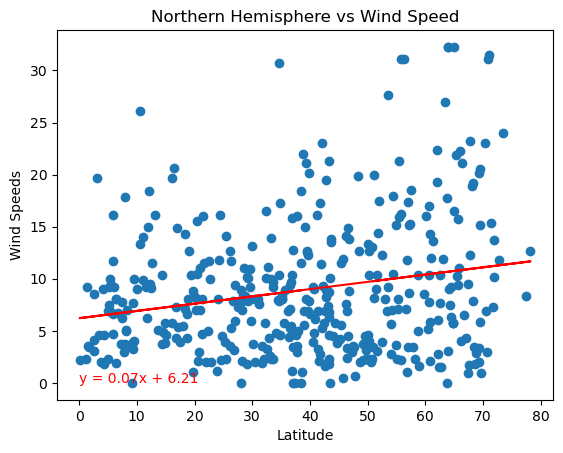

In [208]:
# Northern Hemisphere
# Build scatter plot for each data type:
# x_values = northern_hemi_df["Lat"]
# y_values = northern_hemi_df["Wind Speed"]

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.scatter(x_values,y_values, color="blue", edgecolors="black")
# plt.plot(x_values,regress_values, "darkred", linewidth=2)

# plt.title("Northern Hemi Wind Speed vs. Latitude Linear Regression Plot", fontsize=18)
# plt.ylabel("Wind Speed", fontsize=15, color="black")
# plt.xlabel("Latitude", fontsize=15, color="black")
# plt.annotate(line_eq,(1, 1), fontsize=15, color="darkred")

# plt.ylim(min(northern_hemi_df["Wind Speed"])-10, max(northern_hemi_df["Wind Speed"])+10)
# plt.xlim(-3, max(northern_hemi_df["Lat"])+3)

# plt.savefig("N_Hem_Wind_Speed_vs._Latitude_Linear_Regression_Plot.png")
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

# Call the function
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.savefig("N_Hem_Wind_Speed_vs._Latitude_Linear_Regression_Plot.png")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plot_linear_regression(x_values,
                       y_values,
                       "Northern Hemisphere vs Wind Speed",
                       "Wind Speeds",
                       (-0,0))


r-value: -0.19150865185692495 


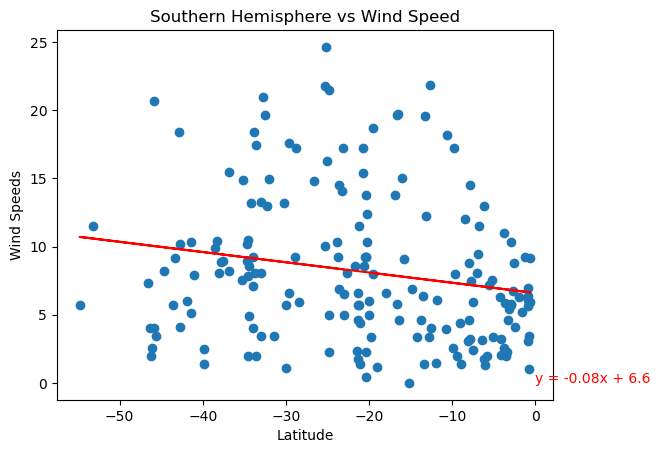

In [209]:
# x_values = southern_hemi_df["Lat"]
# y_values = southern_hemi_df["Wind Speed"]

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plt.scatter(x_values,y_values, color="blue", edgecolors="black")
# plt.plot(x_values,regress_values, "darkred", linewidth=2)

# plt.title("Southern Hemi Wind Speed vs. Latitude Linear Regression Plot", fontsize=18)
# plt.ylabel("Wind Speed", fontsize=15, color="black")
# plt.xlabel("Wind Speed", fontsize=15, color="black")
# plt.annotate(line_eq,(1, 1), fontsize=15, color="darkred")

# plt.ylim(min(southern_hemi_df["Wind Speed"])-10, max(southern_hemi_df["Wind Speed"])+10)
# plt.xlim(-3, max(southern_hemi_df["Lat"])+3)

# plt.savefig("S_Hem_Wind_Speed_vs._Latitude_Linear_Regression_Plot.png")
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

# Call the function
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.savefig("S_Hem_Wind_Speed_vs._Latitude_Linear_Regression_Plot.png")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plot_linear_regression(x_values,
                       y_values,
                       "Southern Hemisphere vs Wind Speed",
                       "Wind Speeds",
                       (-0,0))
